In [56]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
from gensim import corpora, models
from gensim.similarities import Similarity

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    lower_tokens = [t.lower() for t in tokens]
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
    wordnet_lemmatizer = WordNetLemmatizer()
    words_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    return words_lemmatized


# Sample documents
documents = ["I love programming in Python, JAVA, and JavaScript because these languages are versatile and powerful.",
             "Python is great for data science and automation",
             "Python programming is fun and incredibly rewarding"]

# Input keyword
query = "Python or JavaScript programming"

# Tokenize the documents
texts = [preprocess_text(doc) for doc in documents]

# Add the keyword to the corpus
texts.append(preprocess_text(query))

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Convert the documents to a bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a TF-IDF model from the corpus
tfidf_model = models.TfidfModel(corpus)

# Apply the model to the corpus to get the TF-IDF representation
tfidf_corpus = tfidf_model[corpus]

**Cosine Similarity**:

ค่า cosine similarity สูงสุดคือเอกสารที่มีความคล้ายคลึงกับคำค้นมากที่สุด.

Cosine Similarity with Keyword:
Keyword vs Document 0: 0.2353
Keyword vs Document 1: 0.0000
Keyword vs Document 2: 0.0456


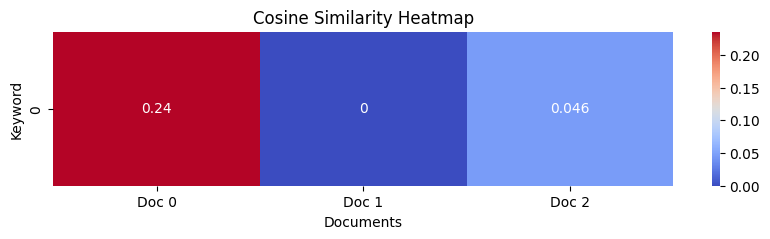

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'index' is your Similarity object
index = Similarity(output_prefix='index', corpus=tfidf_corpus, num_features=len(dictionary))

# Compute cosine similarity between the last document (keyword) and all others
keyword_vector = tfidf_corpus[-1]  # The last vector is for the keyword
similarities = index[keyword_vector]

print("Cosine Similarity with Keyword:")
for i, similarity in enumerate(similarities[:-1]):  # Exclude the keyword itself
    print(f"Keyword vs Document {i}: {similarity:.4f}")

# Exclude the keyword itself from the similarities
similarities = similarities[:-1]

# Create a matrix of similarities for the heatmap
similarity_matrix = np.array(similarities).reshape(1, -1)  # Reshape for 1 row and multiple columns

# Plot the heatmap
plt.figure(figsize=(10, 2))  # Adjust the size as needed
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", cbar=True, xticklabels=[f'Doc {i}' for i in range(len(similarities))])
plt.title("Cosine Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Keyword")
plt.show()


**Euclidean Distance**:
ระยะทางระหว่างคำค้นกับเอกสารน้อยที่สุดบ่งบอกถึงความคล้ายคลึงกันมากที่สุด

Euclidean Distance with Keyword:
Keyword vs Document 0: 1.2367
Keyword vs Document 1: 1.4142
Keyword vs Document 2: 1.3816


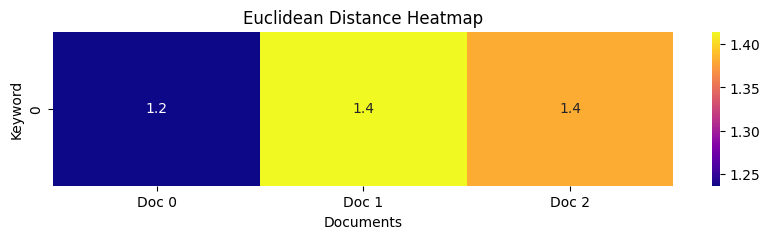

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import euclidean

# Convert sparse TF-IDF vectors to dense vectors
def sparse_to_dense(sparse_vector, num_terms):
    dense_vector = np.zeros(num_terms)
    for term_id, weight in sparse_vector:
        dense_vector[term_id] = weight
    return dense_vector

num_terms = len(dictionary)
dense_tfidf_corpus = [sparse_to_dense(vector, num_terms) for vector in tfidf_corpus]

# Compute Euclidean distance between the keyword vector and document vectors
keyword_vector = dense_tfidf_corpus[-1]
document_vectors = dense_tfidf_corpus[:-1]
distances = [euclidean(keyword_vector, vector) for vector in document_vectors]

print("Euclidean Distance with Keyword:")
for i, distance in enumerate(distances):
    print(f"Keyword vs Document {i}: {distance:.4f}")

# Create a matrix of distances for the heatmap
distance_matrix = np.array(distances).reshape(1, -1)  # Reshape for 1 row and multiple columns

# Plot the heatmap
plt.figure(figsize=(10, 2))  # Adjust the size as needed
sns.heatmap(distance_matrix, annot=True, cmap="plasma", cbar=True, xticklabels=[f'Doc {i}' for i in range(len(distances))])
plt.title("Euclidean Distance Heatmap")
plt.xlabel("Documents")
plt.ylabel("Keyword")
plt.show()

**Jaccard Similarity**:

ค่าที่ดีที่สุดคือค่าที่สูงที่สุด

Jaccard Similarity with Keyword:
Keyword vs Document 0: 0.2857
Keyword vs Document 1: 0.0000
Keyword vs Document 2: 0.2000


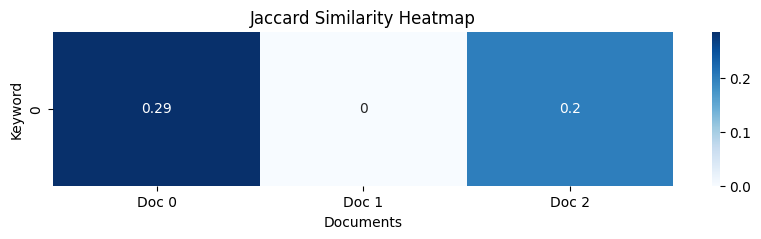

In [79]:
from sklearn.metrics import jaccard_score

# Convert the TF-IDF vectors to binary vectors
def to_binary_vector(tfidf_vector, dictionary):
    vector = np.zeros(len(dictionary))
    for idx, value in tfidf_vector:
        vector[idx] = 1
    return vector

# Ensure all binary vectors are of the same length
keyword_vector_bin = to_binary_vector(tfidf_corpus[-1], dictionary)
document_vectors_bin = [to_binary_vector(vector, dictionary) for vector in tfidf_corpus[:-1]]

# Compute Jaccard similarity
similarities = [jaccard_score(keyword_vector_bin, doc_vector_bin) for doc_vector_bin in document_vectors_bin]

print("Jaccard Similarity with Keyword:")
for i, similarity in enumerate(similarities):
    print(f"Keyword vs Document {i}: {similarity:.4f}")


# Create a matrix of similarities for the heatmap
similarity_matrix = np.array(similarities).reshape(1, -1)  # Reshape for 1 row and multiple columns

# Plot the heatmap
plt.figure(figsize=(10, 2))  # Adjust the size as needed
sns.heatmap(similarity_matrix, annot=True, cmap="Blues", cbar=True, xticklabels=[f'Doc {i}' for i in range(len(similarities))])
plt.title("Jaccard Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Keyword")
plt.show()

**Manhattan Distance**:
ค่าที่ดีที่สุดคือค่าระยะทางที่สั้นที่สุดระหว่างคำค้นกับเอกสารซึ่งบอกถึงความคล้ายคลึงกันมากที่สุด

Manhattan Distance with Keyword:
Keyword vs Document 0: 3.1727
Keyword vs Document 1: 3.3069
Keyword vs Document 2: 2.9077


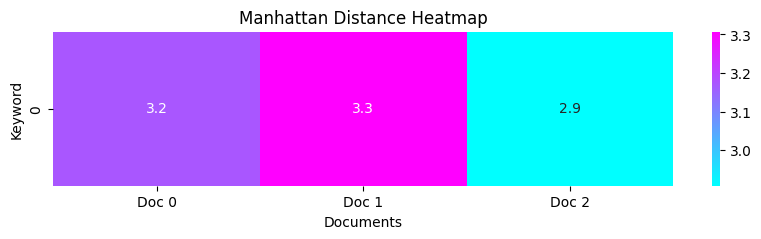

In [80]:
from scipy.spatial.distance import cityblock
from gensim import corpora, models, matutils
# Convert sparse representation to dense numpy arrays
dense_tfidf_corpus = matutils.corpus2csc(tfidf_corpus).T
query_vector = dense_tfidf_corpus[-1]
document_vectors = dense_tfidf_corpus[:-1]

# Compute Manhattan distance between the keyword vector and document vectors
distances = [cityblock(query_vector.toarray().flatten(), doc_vector.toarray().flatten())
             for doc_vector in document_vectors]

print("Manhattan Distance with Keyword:")
for i, distance in enumerate(distances):
    print(f"Keyword vs Document {i}: {distance:.4f}")

# Create a matrix of distances for the heatmap
distance_matrix = np.array(distances).reshape(1, -1)  # Reshape for 1 row and multiple columns

# Plot the heatmap
plt.figure(figsize=(10, 2))  # Adjust the size as needed
sns.heatmap(distance_matrix, annot=True, cmap="cool", cbar=True, xticklabels=[f'Doc {i}' for i in range(len(distances))])
plt.title("Manhattan Distance Heatmap")
plt.xlabel("Documents")
plt.ylabel("Keyword")
plt.show()